In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

## Libraries

**Matplotlib**:
- Standard plotting library in Python.

**Seaborn**:
- Wrapper around Matplotlib convenient when dealing with Pandas dataframes.

In [2]:
from sklearn.datasets import fetch_openml
housing = fetch_openml(name="house_prices", as_frame=True)
data = housing["frame"]
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## Plotting Table

| Num Feats | Feature Types               | Plot Type                |
|-----------|-----------------------------|--------------------------|
| 1 feature | continuous                  | histogram                |
|           | categorical                 | barplot                  |
| 2 features| 2 continuous                | scatterplot, lineplot    |
|           | 1 continuous, 1 categorical | boxplot                  |
|           | 2 categorical               | colored barplot          |
| 3 features| 2 continuous, 1 categorical | colored scatterplot/lineplot |
|           | 1 continuous, 2 categorical | colored boxplot          |

In [3]:
data["House_Style"] = data["HouseStyle"].replace({
    "1Story": "One Story",
    "1.5Fin": "One and Half Story",
    "1.5Unf": "One and Half Story",
    "2Story": "Two Story",
    "2.5Fin": "Two and Half Story",
    "2.5Unf": "Two and Half Story",
    "SFoyer": "Other",
    "SLvl": "Other",
    "Duplx": "Other"
}) 

Text(0, 0.5, 'Frequency')

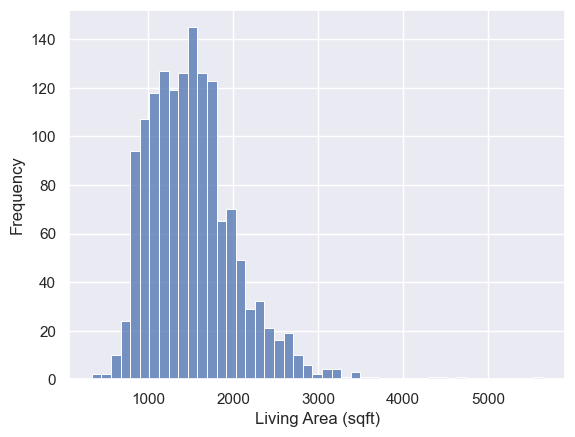

In [6]:
# Plotting one continuous feature
sns.histplot(data=data, x="GrLivArea")

# Set the x and y axis labels
plt.xlabel("Living Area (sqft)")
plt.ylabel("Frequency")

Text(0, 0.5, 'House Style')

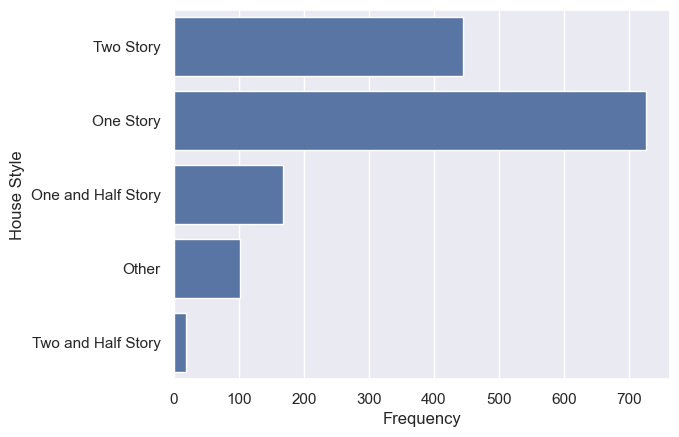

In [7]:
# Plotting one categorical variable
sns.countplot(data=data, y="House_Style")
plt.xlabel("Frequency")
plt.ylabel("House Style")

Text(0, 0.5, 'Sale Price')

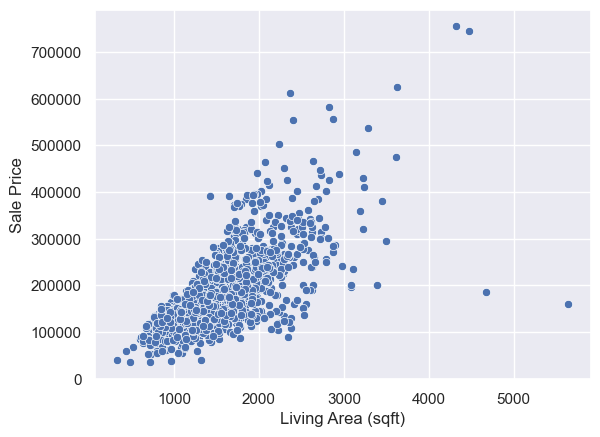

In [8]:
# Plotting two continuous variables
sns.scatterplot(data=data, x="GrLivArea", y="SalePrice")
plt.xlabel("Living Area (sqft)")
plt.ylabel("Sale Price")

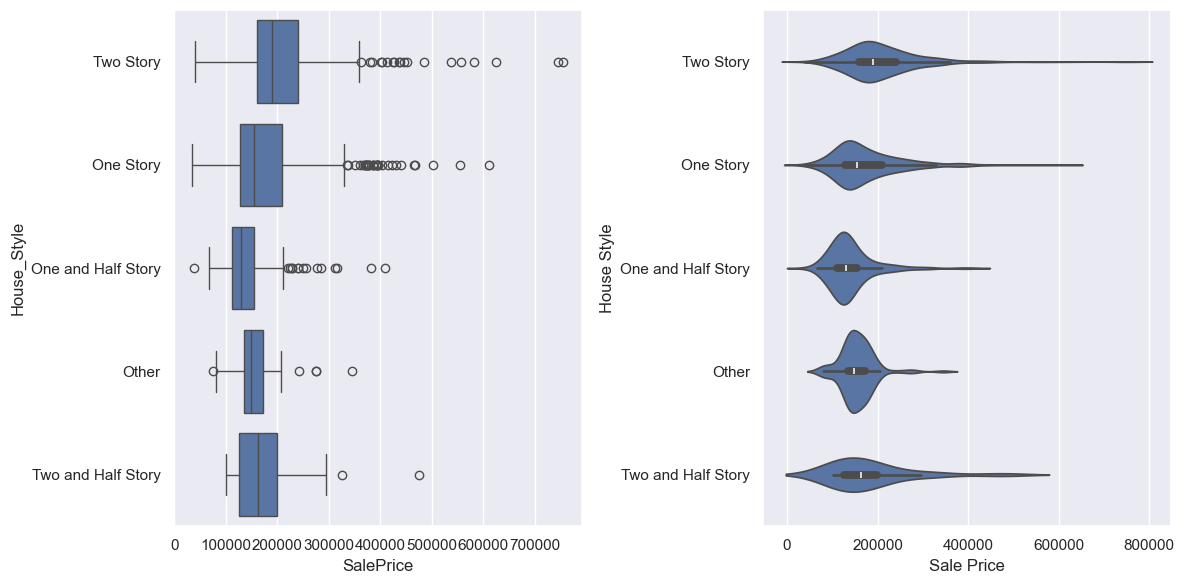

In [10]:
# Plotting one categorical and one continuous variable
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(data=data, y="House_Style", x="SalePrice", ax=axes[0])
sns.violinplot(data=data, y="House_Style", x="SalePrice", ax=axes[1])
plt.xlabel("Sale Price")
plt.ylabel("House Style")

plt.tight_layout()

Text(0, 0.5, 'House Style')

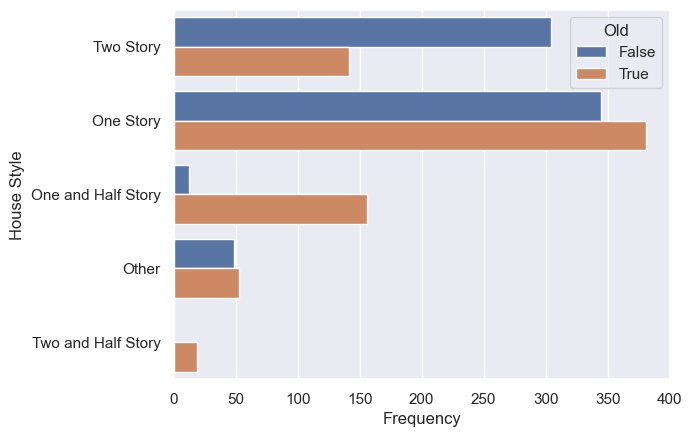

In [13]:
# Plotting two categorical
data["Old"] = data["YearBuilt"] < 1975
sns.countplot(data=data, y="House_Style", hue="Old")
plt.xlabel("Frequency")
plt.ylabel("House Style")

Text(0.5, 1.0, 'Sale Price by House Style\n Grouped by Age')

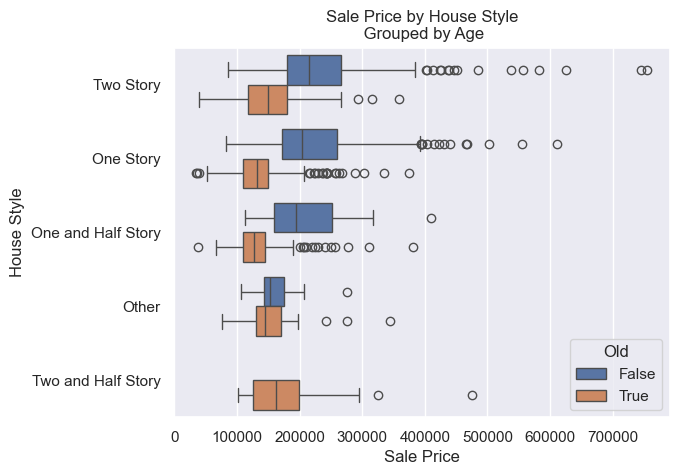

In [14]:
# Plotting 1 continuous and 2 categorical
data["Old"] = data["YearBuilt"] < 1975
sns.boxplot(data=data, y="House_Style", x="SalePrice", hue="Old")
plt.xlabel("Sale Price")
plt.ylabel("House Style")
plt.title("Sale Price by House Style\n Grouped by Age")

Text(0.5, 1.0, 'Sale Price by Living Area\n Grouped by Age')

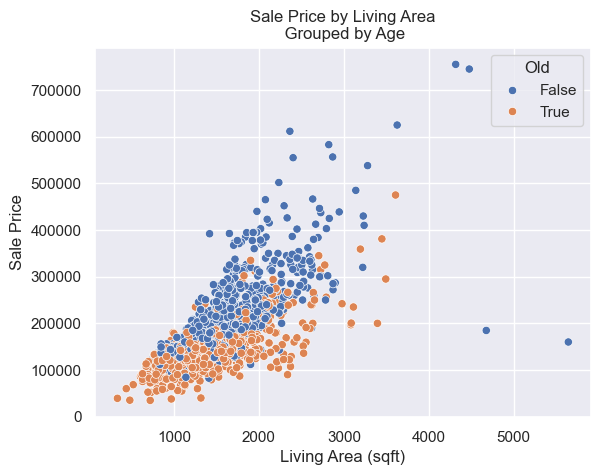

In [15]:
# Plotting 2 continuous and 1 categorical
sns.scatterplot(data=data, x="GrLivArea", y="SalePrice", hue="Old")
plt.xlabel("Living Area (sqft)")
plt.ylabel("Sale Price")
plt.title("Sale Price by Living Area\n Grouped by Age")

## Exercise

Come up with 3 interesting plots that you could make that describe housing prices, or another dataset of your choosing!
- Start by thinking about what features might be relevant, and what the datatypes are of those features.
- Use the table as a starting point to figuring out what type of plot to use.
- Be creative!!!